In [1]:
# Import packages
import scanpy as sc
import numpy as np
import pandas as pd

In [2]:
# Variables
file = "../data/BCB/full.h5ad"
hlca_file = "../data/HLCA/core.h5ad"

In [3]:
# Read data
ds = sc.read(file)
ds

AnnData object with n_obs × n_vars = 320709 × 36601
    obs: 'sample_id', 'libname', 'sample', 'cohort', 'lane', 'index', 'TotalSeq.A', 'Chemistry', 'run', 'frozen', 'freeze_method', 'virus_SCoV2', 'virus_HSV.1', 'virus_CMV', 'virus_HHV6A', 'virus_HHV6B', 'hto_clust', 'libsize', 'nfeatures', 'percent.mt', 'qc_linear', 'qc_adaptive', 'batch', 'ann_level_1_pred', 'ann_level_1_uncertainty', 'ann_level_2_pred', 'ann_level_2_uncertainty', 'ann_level_3_pred', 'ann_level_3_uncertainty', 'ann_level_4_pred', 'ann_level_4_uncertainty', 'ann_level_5_pred', 'ann_level_5_uncertainty', 'ann_finest_level_pred', 'ann_finest_level_uncertainty', 'cell_type_pred', 'cell_type_uncertainty'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'seurat2000', 'seurat5000'
    uns: 'hvg', 'hvg_keys', 'log1p'
    obsm: 'X_seurat2000_fastMNN_n10k10', 'X_seurat2000_fastMNN_n30k10', 'X_seurat2000_fa

In [4]:
# Export transferred labels
ind = ds.obs.columns[ds.obs.columns.str.contains("cell_type")]
ind = ind.append(ds.obs.columns[ds.obs.columns.str.contains("ann_level")])
df = ds.obs[ind]
df.to_csv("../data/BCB/full_hlca-labels.csv")

In [5]:
# Export HLCA latent embedding
arr = ds.obsm["hlca"]
arr.tofile("../data/BCB/full_hlca-latent.csv", sep=",")

In [ ]:
# Load HLCA
hlca = sc.read(hlca_file)
hlca

/home/odietric/miniconda3/envs/covid19-bal-atlas/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/odietric/miniconda3/envs/covid19-bal-atlas/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/odietric/miniconda3/envs/covid19-bal-atlas/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


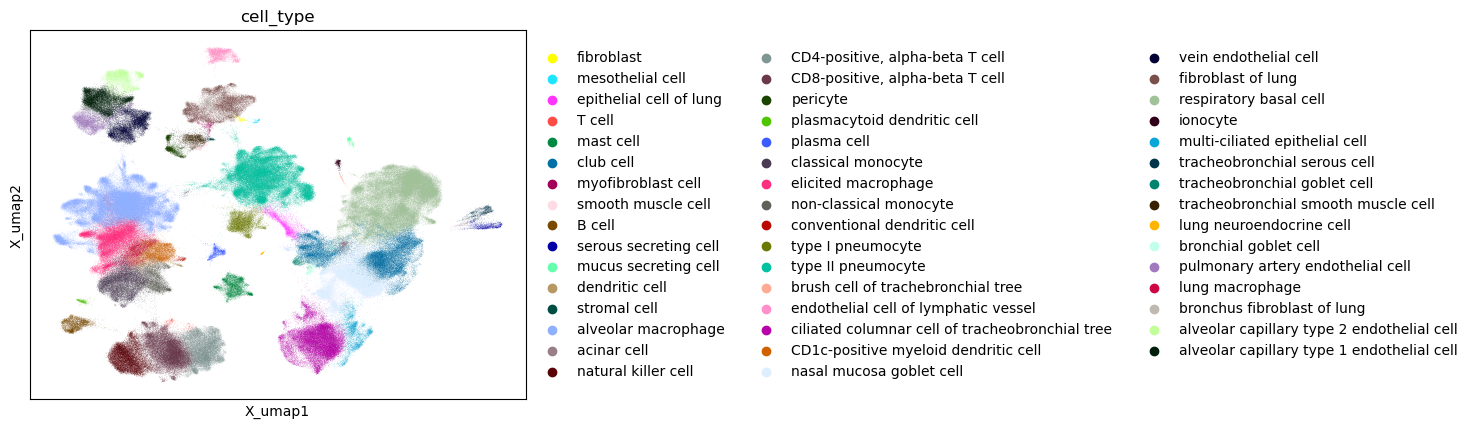

In [7]:
# Show reference map
sc.pl.embedding(hlca, basis="X_umap", color="cell_type")

In [8]:
# Create new annotation level
ref_type = hlca.obs["cell_type"]
ref_type = ref_type.astype("str")
ref_type[hlca.obs.ann_level_1 == "Epithelial"] = "Epithelial"
ref_type[hlca.obs.ann_level_1 == "Endothelial"] = "Endothelial"
ref_type[hlca.obs.ann_level_1 == "Stroma"] = "Stroma"
hlca.obs["ref_type"] = ref_type.astype("category")

/home/odietric/miniconda3/envs/covid19-bal-atlas/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/odietric/miniconda3/envs/covid19-bal-atlas/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/odietric/miniconda3/envs/covid19-bal-atlas/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


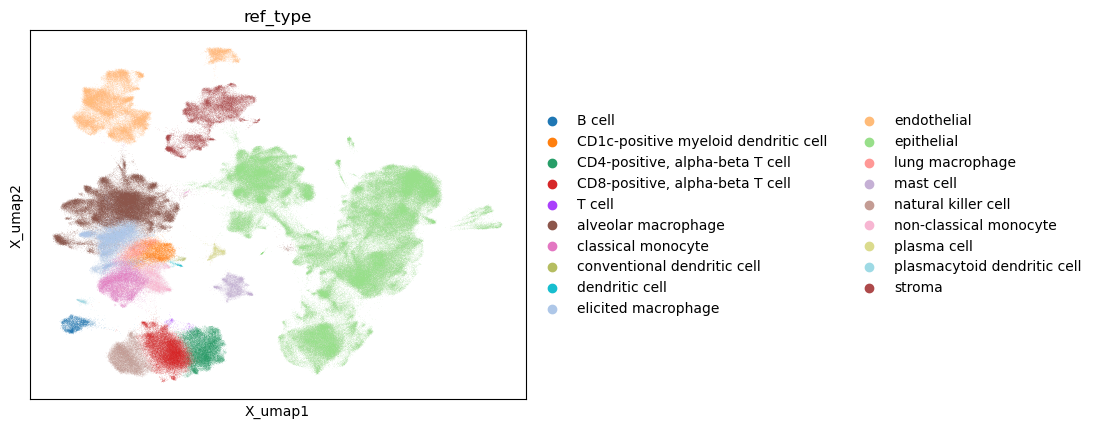

In [9]:
# Show reference annotation
sc.pl.embedding(hlca, basis="X_umap", color="ref_type")

In [10]:
# Compute UMAP
sc.pp.neighbors(ds, use_rep="counts_seurat2000_scVI_n30l1h128")
sc.tl.umap(ds, min_dist=0.3)

/home/odietric/miniconda3/envs/covid19-bal-atlas/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/odietric/miniconda3/envs/covid19-bal-atlas/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/odietric/miniconda3/envs/covid19-bal

In [11]:
sc.tl.umap(ds, min_dist=0.3)

/home/odietric/miniconda3/envs/covid19-bal-atlas/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/odietric/miniconda3/envs/covid19-bal-atlas/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/odietric/miniconda3/envs/covid19-bal-atlas/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


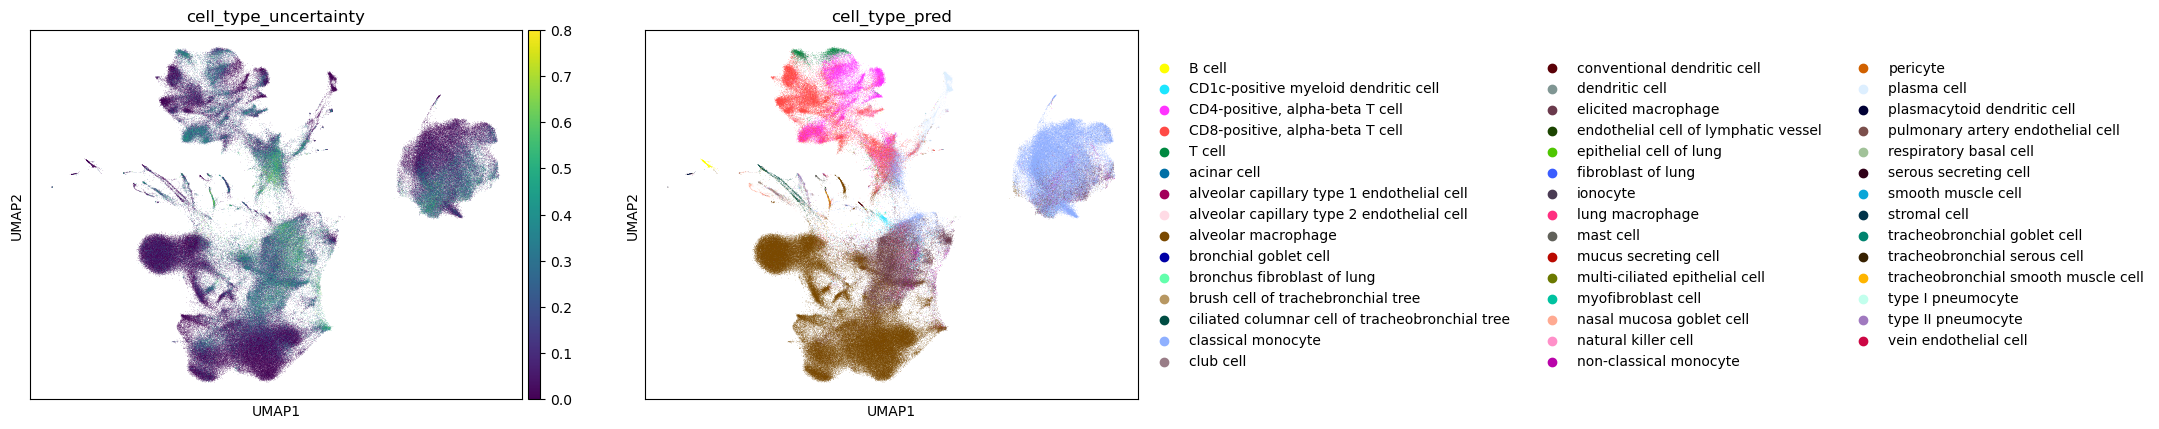

In [26]:
sc.pl.embedding(ds, basis="umap", color=["cell_type_uncertainty", "cell_type_pred"])

In [22]:
# Create new annotation level
ref_type = ds.obs["cell_type_pred"]
ref_type = ref_type.astype("str")
ref_type[ds.obs.ann_level_1_pred == "Epithelial"] = "epithelial"
ref_type[ds.obs.ann_level_1_pred == "Endothelial"] = "endothelial"
ref_type[ds.obs.ann_level_1_pred == "Stroma"] = "stroma"
ds.obs["ref_type"] = ref_type.astype("category")

In [36]:
sc.pl.embedding(ds, basis="X_umap", color=["ref_type"], components=['2,1'])

SyntaxError: positional argument follows keyword argument (1507934199.py, line 1)

In [35]:
ds.obs["score"] = ds.obs["cell_type_pred"].values.isin(["T cell"]).astype(int)

In [41]:
ds.obs["score"] = ds.obs["sample"].values.isin(["BAL_1"]).astype(str)

/home/odietric/miniconda3/envs/covid19-bal-atlas-integration/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/odietric/miniconda3/envs/covid19-bal-atlas-integration/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


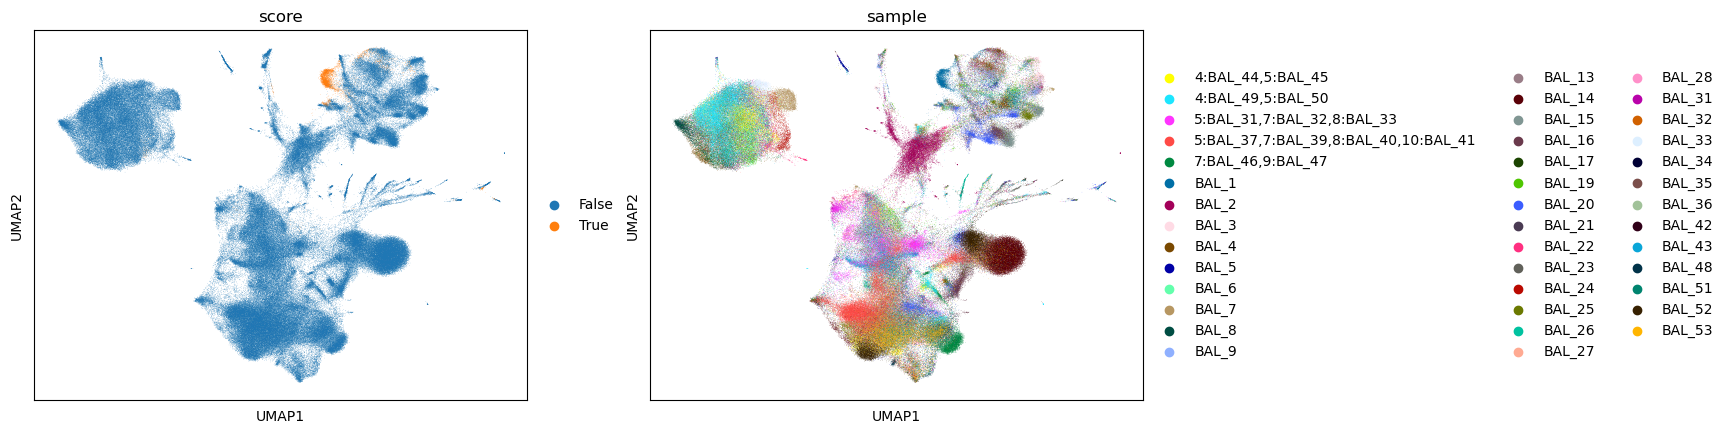

In [43]:
sc.pl.embedding(ds, basis="umap", color=["score", "sample"])

In [12]:
# Put normalized (cp10k) counts in X
ds.X = ds.layers["cp10k"]

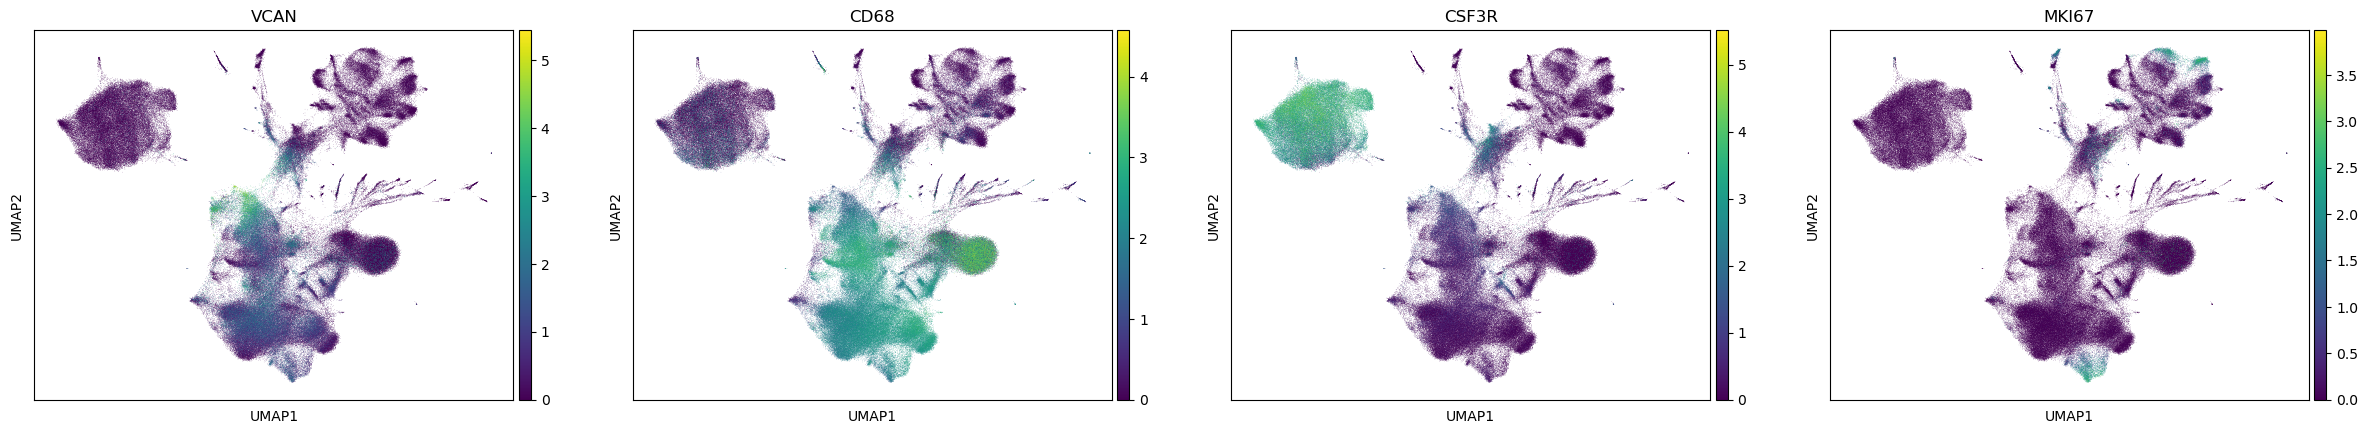

In [19]:
# Show marker genes
sc.pl.umap(ds, color=["VCAN", "CD68", "CSF3R", "MKI67"])

In [58]:
hlca.var.index = hlca.var.feature_name.values
hlca.var

,n_cells,highly_variable,means,dispersions,feature_is_filtered,feature_name,feature_reference,feature_biotype
TSPAN6,106120,False,0.172146,0.962372,False,TSPAN6,NCBITaxon:9606,gene
TNMD,305,False,0.000224,0.701593,False,TNMD,NCBITaxon:9606,gene
DPM1,140518,False,0.207243,0.859629,False,DPM1,NCBITaxon:9606,gene
SCYL3,31464,False,0.034430,0.925702,False,SCYL3,NCBITaxon:9606,gene
C1orf112,10484,False,0.011548,0.960026,False,C1orf112,NCBITaxon:9606,gene
...,...,...,...,...,...,...,...,...
RP11-11M20.4,2701,False,0.002350,0.955800,False,RP11-11M20.4,NCBITaxon:9606,gene
LLNLR-245B6.1,73401,False,0.093291,0.910759,False,LLNLR-245B6.1,NCBITaxon:9606,gene
MGC4859,131,False,0.000159,0.410029,False,MGC4859,NCBITaxon:9606,gene
RP11-107E5.4,22,False,0.000028,0.631858,False,RP11-107E5.4,NCBITaxon:9606,gene


In [8]:
# Prepare query
print("Preparing query dataset...")
query = ds.copy()
query.X = query.layers["counts"]
query.obs["dataset"] = query.obs.sample
query.obs["scanvi_label"] = "unlabeled"
query.var["gene_name"] = query.var.index.tolist()
query.var.index = query.var["gene_ids"].values

Preparing query dataset...


/home/odietric/miniconda3/envs/covid19-bal-atlas-scarches/lib/python3.10/site-packages/anndata/_core/anndata.py:1391: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  warnings.warn(


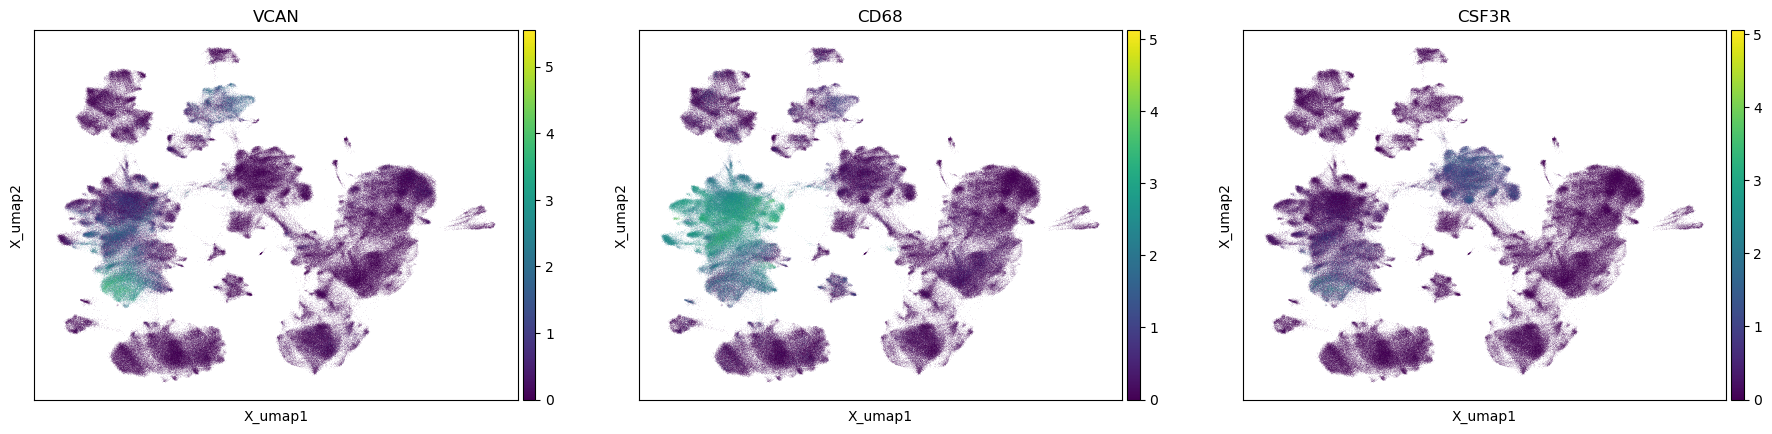

In [38]:
sc.pl.embedding(hlca, basis="X_umap", gene_symbols="feature_name", layer="X", color=["VCAN", "CD68", "CSF3R"])

In [39]:
ds.var

,gene_ids,feature_types,genome,highly_variable,means,dispersions,dispersions_norm,highly_variable_nbatches,highly_variable_intersection,seurat2000,seurat5000
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38-viral,False,0.000010,-0.301530,-0.441621,0,False,False,False
FAM138A,ENSG00000237613,Gene Expression,GRCh38-viral,False,0.000000,0.000000,0.000000,0,False,False,False
OR4F5,ENSG00000186092,Gene Expression,GRCh38-viral,False,0.000020,-0.003792,-0.073011,0,False,False,False
AL627309.1,ENSG00000238009,Gene Expression,GRCh38-viral,True,0.042494,1.341766,0.546360,16,False,False,True
AL627309.3,ENSG00000239945,Gene Expression,GRCh38-viral,False,0.000133,-0.203756,-0.590829,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
AC141272.1,ENSG00000277836,Gene Expression,GRCh38-viral,False,0.000037,-0.026588,-0.114334,0,False,False,False
AC023491.2,ENSG00000278633,Gene Expression,GRCh38-viral,False,0.000086,-0.003009,-0.141956,0,False,False,False
AC007325.1,ENSG00000276017,Gene Expression,GRCh38-viral,False,0.000251,0.030167,-0.146374,2,False,False,False
AC007325.4,ENSG00000278817,Gene Expression,GRCh38-viral,False,0.020578,0.540527,-0.244940,0,False,False,False


In [42]:
ds.obs["sample"]

AAACCCAGTTCCGTTC-1      BAL_1
AAACCCATCACCATCC-1      BAL_1
AAACCCATCTGAGATC-1      BAL_1
AAACCCATCTGGGATT-1      BAL_1
AAACGAAAGTATGTAG-1      BAL_1
                        ...  
TTTGTTGCAAGAGGCT-41    BAL_53
TTTGTTGCACTTCTCG-41    BAL_53
TTTGTTGCAGTTGTCA-41    BAL_53
TTTGTTGGTAATGCGG-41    BAL_53
TTTGTTGGTGATAGAT-41    BAL_53
Name: sample, Length: 320709, dtype: category
Categories (41, object): ['4:BAL_44,5:BAL_45', '4:BAL_49,5:BAL_50', '5:BAL_31,7:BAL_32,8:BAL_33', '5:BAL_37,7:BAL_39,8:BAL_40,10:BAL_41', ..., 'BAL_48', 'BAL_51', 'BAL_52', 'BAL_53']